In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/1.ushape.csv',names=['X','Y','class'])

In [ ]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


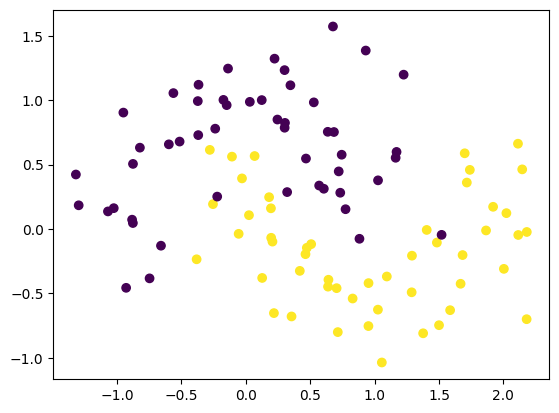

In [ ]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [ ]:
X,y

(array([[ 0.03159499,  0.98698776],
        [ 2.11509784, -0.04624397],
        [ 0.88248972, -0.07575606],
        [-0.0551441 , -0.03733246],
        [ 0.82954503, -0.53932149],
        [ 2.11285708,  0.66208353],
        [ 0.5696927 ,  0.33744136],
        [ 0.95217454, -0.75307471],
        [-0.02922115,  0.39287336],
        [ 1.71579557,  0.36069454],
        [-0.27883014,  0.61420539],
        [ 2.00344509, -0.3091496 ],
        [ 1.50009616, -0.74636376],
        [ 1.22540835,  1.19793017],
        [ 0.46730819,  0.54703192],
        [-0.36653222,  1.11971633],
        [ 0.30124459,  1.23315697],
        [ 0.30430746,  0.82373935],
        [-0.23712492,  0.77876034],
        [ 1.16339832,  0.55290238],
        [-0.59702417,  0.6572361 ],
        [ 0.46356735, -0.1951543 ],
        [ 0.68451111,  0.75287685],
        [ 0.70515699, -0.45892444],
        [-0.65805008, -0.12944211],
        [-0.74662946, -0.3829632 ],
        [ 0.60585226,  0.31252842],
        [ 2.18137168, -0.022

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[-0.64759374, -0.3405752 ,  0.04370934,  0.10224944,  0.14828843,
          0.5058058 , -0.10519266,  0.2739218 , -0.04781103,  0.19393718],
        [ 0.07809508, -0.68590117,  0.5824278 , -0.08132792,  0.25762326,
          0.10033274,  0.5227104 ,  0.6551053 ,  0.0570547 ,  0.26537985]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.15956026, -0.45889047,  0.17179823,  0.41957694, -0.16824782,
         -0.1236259 , -0.13733676, -0.19151428,  0.15637237, -0.20539674],
        [ 0.13679272, -0.02220494, -0.35969406,  0.01723164,  0.5427675 ,
         -0.19337973,  0.00957638,  0.5002618 ,  0.06477284,  0.05163747],
        [ 0.06003499,  0.53728163, -0.22386336, -0.5066901 ,  0.06300771,
         -0.09339431,  0.04991931,  0.16418314, -0.21881968,  0.21120739],
        [-0.46240288,  0.18744516,  0.40294456, -0.3509915 ,  0.03754985,
          0.35641372,  0.14831579, -0.22018966, -0.43357405,  0.3614437 ],
        [ 0.30132

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[ 0.6579539 ,  0.44310558,  1.0270169 ,  0.4399609 ,  0.1208559 ,
         -0.9711452 ,  0.30421954,  0.68248034,  0.6064518 , -1.9473449 ],
        [ 1.3215103 , -0.12958138, -1.2398925 , -0.89314985,  0.6606907 ,
         -1.4061067 , -0.9256154 , -0.4849408 , -0.31493643,  0.8693681 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.4206504 , -0.13973601, -0.01462773, -0.15457177, -0.2121891 ,
         -0.42313477, -0.08843992,  0.32363522,  0.4612853 ,  0.22178103],
        [ 0.2685875 ,  0.19500366,  0.11597895,  0.11294065,  0.17177527,
         -0.3677862 , -0.3894485 , -0.258737  , -0.07827344,  0.54553574],
        [ 0.0326605 , -0.10731012,  0.1614709 , -0.10852002, -0.6269055 ,
          0.70649815, -0.01511531, -0.24095026, -0.38119048, -0.38026348],
        [-0.05605214, -0.17032826, -0.02154372,  0.24290414, -0.63361216,
          0.0077754 , -0.14739345, -0.20074533,  0.44300845,  0.31961924],
        [-0.02531

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.3758 - loss: 0.7074 - val_accuracy: 0.3500 - val_loss: 0.7161
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5461 - loss: 0.6860 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6727 - loss: 0.6660 - val_accuracy: 0.7000 - val_loss: 0.6694
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6703 - loss: 0.6497 - val_accuracy: 0.8000 - val_loss: 0.6462
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7617 - loss: 0.6279 - val_accuracy: 0.8500 - val_loss: 0.6235
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7766 - loss: 0.6154 - val_accuracy: 0.8500 - val_loss: 0.6014
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7984 - loss: 0.5951 - val_accuracy: 0.8500 - val_loss: 0.5797
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8266 - loss: 0.5830 - val_accuracy: 0.8500 - val_loss

In [ ]:
model.get_weights()

[array([[ 0.65159553,  0.32259804,  0.9147039 ,  0.36522233,  0.01449789,
         -1.1396525 ,  0.40121567,  0.59298706,  0.5581963 , -2.1547332 ],
        [ 1.3477993 , -0.04546855, -1.363922  , -0.8024023 ,  0.7007826 ,
         -1.4654413 , -0.9401939 , -0.5471091 , -0.26813588,  0.8906088 ]],
       dtype=float32),
 array([-0.10360854,  0.01338561, -0.12430593, -0.05476546,  0.00873287,
        -0.31482315,  0.01309439, -0.05823062, -0.04972202,  0.25956827],
       dtype=float32),
 array([[-3.6267704e-01, -9.0960942e-02,  1.5832834e-02, -1.7957133e-01,
         -2.7033791e-01, -4.5711842e-01, -7.3139362e-02,  2.4585512e-01,
          5.2687436e-01,  1.8006399e-01],
        [ 3.5334429e-01,  1.2552366e-01,  6.3175894e-02,  1.6974390e-01,
          1.2449596e-01, -2.6929545e-01, -4.5277965e-01, -1.7661645e-01,
         -1.5807378e-01,  4.4226691e-01],
        [ 7.4724838e-02, -1.5438598e-01,  1.5313569e-01, -7.5718321e-02,
         -6.6136491e-01,  8.0460882e-01, -4.2228453e-02, -1

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

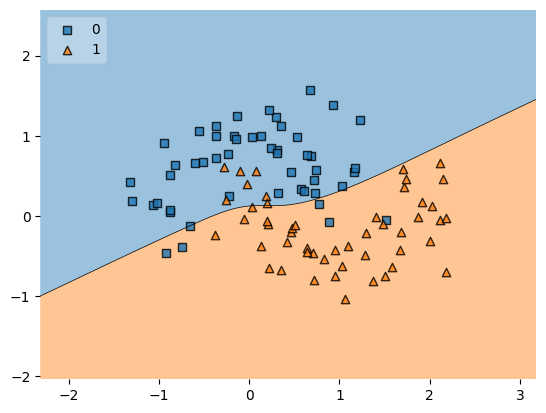

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

#He Weights Initialization

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[-1.0637498 ,  0.54451865,  1.3104624 ,  0.47072083,  1.160654  ,
         -1.10244   , -0.6314765 , -1.7764663 , -0.24746287, -0.06971634],
        [ 1.6871601 , -1.1062812 , -0.67470294, -0.6872868 , -0.9937834 ,
          0.276556  , -0.36669657,  1.5563552 ,  1.2611382 ,  1.5726709 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.61850053,  0.32641032, -0.1187361 ,  0.2025971 ,  0.6642447 ,
         -0.4672441 , -1.0087637 , -0.36105374, -0.7506926 , -0.11631875],
        [-0.23629   ,  0.8575697 , -0.3265849 , -0.12995745,  0.22397515,
          0.13449009, -0.07932208, -0.6483618 ,  0.20247729, -0.15291248],
        [-0.529322  , -0.55025995, -0.10088128, -0.71015465, -0.03505658,
          0.5105082 , -0.07594272, -0.22036979, -0.14693652,  0.17844276],
        [-0.73262125, -0.30653718,  0.60433406, -0.05641623,  0.05746387,
          0.35736254,  0.40225336, -0.4342183 , -0.14935263, -0.12567964],
        [ 0.36222

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.5000 - loss: 0.8231 - val_accuracy: 0.5000 - val_loss: 0.7266
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4883 - loss: 0.8082 - val_accuracy: 0.5000 - val_loss: 0.6980
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5469 - loss: 0.7113 - val_accuracy: 0.5000 - val_loss: 0.6723
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5430 - loss: 0.6895 - val_accuracy: 0.5000 - val_loss: 0.6492
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5078 - loss: 0.7028 - val_accuracy: 0.5000 - val_loss: 0.6282
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5258 - loss: 0.6799 - val_accuracy: 0.5000 - val_loss: 0.6088
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4906 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.5914
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5141 - loss: 0.6610 - val_accuracy: 0.5000 - val_loss

In [ ]:
model.get_weights()

[array([[-1.2847152 ,  0.71227884,  1.244914  ,  0.4222643 ,  1.1805035 ,
         -1.3119242 , -0.6901122 , -1.9714301 , -0.21458438, -0.04112228],
        [ 1.6642259 , -1.235529  , -0.85528755, -0.646946  , -0.99788135,
          0.18695892, -0.5783566 ,  1.566899  ,  1.3691293 ,  1.6994152 ]],
       dtype=float32),
 array([ 0.16840625, -0.00973564, -0.1824832 , -0.07759994,  0.07870293,
        -0.04191913,  0.102179  ,  0.07276157, -0.05154998,  0.04420632],
       dtype=float32),
 array([[-0.55720806,  0.40353143, -0.1187361 ,  0.15967692,  0.7777237 ,
         -0.43070745, -0.9354402 , -0.36105374, -0.7506926 , -0.10022552],
        [-0.34139338,  0.68792725, -0.3265849 , -0.3015848 ,  0.34746498,
          0.10920981, -0.17097701, -0.6483618 ,  0.20247729, -0.2452381 ],
        [-0.43920746, -0.38361773, -0.10088128, -0.7787465 ,  0.05641869,
          0.46661174, -0.15802845, -0.22036979, -0.14693652,  0.14416938],
        [-0.8273352 , -0.30653718,  0.60433406, -0.21464536, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

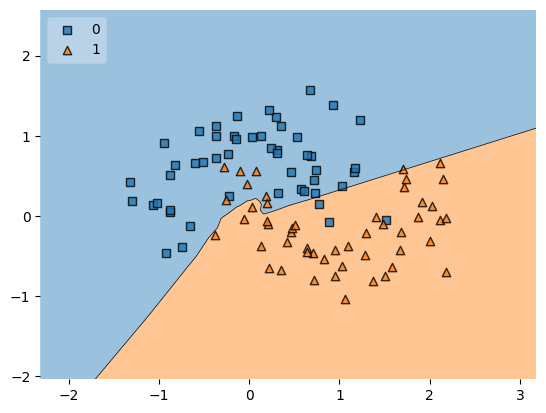

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)